# K-means clustering

## Table of Contents
* [Import Libraries](#chapter1)
    * [Import magic autoreload](#section_1_1)
    * [Import the libraries](#section_1_2)
    * [Import custom functions.](#section_1_3)
* [Data Analysis](#chapter2)
* [Inspect the Data](#chapter3)
* [Create new variables](chapter4)
* [Save the Data](#chapter5)


In [2]:
# autoreload 2
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pylab import rcParams

In [4]:
os.chdir("C:/Users/migue/OneDrive - NOVAIMS/Data Science/Coding Courses/Machine Learning II/Project")
# wd stands for working directory
wd = os.getcwd()

In [5]:
from functions.funcs import *

In [6]:
rcParams['figure.figsize'] = 10, 6

In [6]:
path = wd + "/cluster_data/"
for file in os.listdir(path):
    name = file.split(".")[0]
    globals()[name] = pd.read_csv(path + file)
    print(f"Created dataframe {blue}{name}{end} from {file}")

Created dataframe Basket from Basket.csv
Created dataframe Info from Info.csv
Created dataframe Mapping from Mapping.csv
Created dataframe Supermarkets from Supermarkets.csv


In [8]:
print_cols(Info, 'Info')

Columns in Info are: 
	-customer_id, customer_name, customer_gender, customer_birthdate, kids_home, 
	-teens_home, number_complaints, distinct_stores_visited, lifetime_spend_groceries, lifetime_spend_electronics, 
	-typical_hour, lifetime_spend_vegetables, lifetime_spend_nonalcohol_drinks, lifetime_spend_alcohol_drinks, lifetime_spend_meat, 
	-lifetime_spend_fish, lifetime_spend_hygiene, lifetime_spend_videogames, lifetime_total_distinct_products, percentage_of_products_bought_promotion, 
	-year_first_transaction, loyalty_card_number, latitude, longitude, is_business, 
	-age, years_as_customer, lifetime_spend, spend_per_year, education_level



### Define the variables to use for k-means:
 

In [9]:
x_train = [col for col in Info.columns if 'spend' in col] + ['kids_home', 'teens_home', 'number_complaints', 'age', 'distinct_stores_visited',
                                                              'is_business', 'education_level', 'percentage_of_products_bought_promotion']

In [10]:
Info[Info['is_business'] == 0]

,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,year_first_transaction,loyalty_card_number,latitude,longitude,is_business,age,years_as_customer,lifetime_spend,spend_per_year,education_level
0,4239,Sara Moscowitz,female,1999-09-10 03:11:00,0.0,0.0,0.0,2.0,91.0,20.0,...,2017.0,NaN,38.754263,-9.163397,0,24,4.0,1545.0,386.250000,0
1,19330,Donald Robertson,male,1981-06-26 10:58:00,1.0,0.0,0.0,2.0,197.0,5958.0,...,2015.0,NaN,38.777761,-9.156197,0,42,6.0,10219.0,1703.166667,0
2,2272,Phd. Felicia Bradshaw,female,1987-01-31 09:08:00,1.0,1.0,0.0,20.0,397.0,20.0,...,2008.0,NaN,38.785329,-9.127113,0,36,13.0,1753.0,134.846154,3
3,25288,Emma Williams,female,1942-06-17 12:02:00,3.0,4.0,1.0,2.0,5282.0,237.0,...,2010.0,NaN,38.744086,-9.156589,0,81,11.0,11195.0,1017.727273,0
4,12829,Hilda Huerta,female,2000-01-31 11:43:00,0.0,0.0,0.0,2.0,82.0,22.0,...,2015.0,NaN,38.756024,-9.162970,0,23,6.0,1370.0,228.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,625,Phd. Karen Watts,female,1974-11-01 05:26:00,0.0,0.0,1.0,2.0,209.0,5474.0,...,2008.0,935162.0,38.734446,-9.171911,0,49,13.0,9730.0,748.461538,3
29996,26447,Curtis Thompson,male,1986-02-21 11:27:00,0.0,0.0,0.0,3.0,185.0,1066.0,...,2014.0,NaN,38.767070,-9.144301,0,37,7.0,2416.0,345.142857,0
29997,182,Richard Carter,male,2001-01-14 05:49:00,0.0,0.0,0.0,2.0,83.0,23.0,...,2016.0,953891.0,38.728487,-9.164140,0,22,5.0,1491.0,298.200000,0
29998,13768,Jerry Yoder,male,1958-08-21 12:12:00,1.0,0.0,1.0,20.0,391.0,20.0,...,2006.0,NaN,38.751123,-9.182512,0,65,15.0,1608.0,107.200000,0


In [11]:
Info[Info['is_business'] == 1]

,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,year_first_transaction,loyalty_card_number,latitude,longitude,is_business,age,years_as_customer,lifetime_spend,spend_per_year,education_level
245,1441,Fausto`s Supermarket,male,1989-01-23 11:26:00,0.0,0.0,0.0,1.0,2.678482,1.095507,...,2008.0,961221.0,38.866242,-9.110871,1,34,13.0,34440.075546,2649.236580,0
277,3399,Sandy`s Supermarket,female,1970-07-11 12:57:00,0.0,0.0,0.0,1.0,2.797932,1.141087,...,2009.0,NaN,38.866366,-9.111207,1,53,12.0,36167.224888,3013.935407,0
325,8086,Eugene`s Supermarket,male,1956-02-29 08:26:00,0.0,0.0,0.0,1.0,2.802438,1.146242,...,2010.0,NaN,38.865887,-9.111353,1,67,11.0,34792.208375,3162.928034,0
339,9706,Michele`s Supermarket,female,1962-12-06 02:12:00,0.0,0.0,0.0,1.0,2.844843,1.184050,...,2009.0,NaN,38.866273,-9.111174,1,61,12.0,35015.298127,2917.941511,0
770,17805,Robert`s Supermarket,male,1982-09-22 03:36:00,0.0,0.0,0.0,1.0,2.751432,1.127715,...,2008.0,NaN,38.866607,-9.111206,1,41,13.0,35824.164410,2755.704955,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28257,4689,Justin`s Supermarket,male,1959-03-20 03:59:00,0.0,0.0,0.0,1.0,2.741558,1.113587,...,2011.0,NaN,38.866031,-9.111438,1,64,10.0,34849.148832,3484.914883,0
28590,16270,Melissa`s Supermarket,female,1996-05-11 05:49:00,0.0,0.0,0.0,1.0,2.768803,1.175120,...,2008.0,NaN,38.865962,-9.110773,1,27,13.0,34646.300513,2665.100039,0
29259,10262,Francis`s Supermarket,male,1970-11-05 01:58:00,0.0,0.0,0.0,1.0,2.788190,1.130447,...,2010.0,NaN,38.866438,-9.111502,1,53,11.0,34723.257873,3156.659807,0
29782,25570,Tracy`s Supermarket,female,1976-06-11 02:22:00,0.0,0.0,0.0,1.0,2.741804,1.163490,...,2012.0,NaN,38.866384,-9.110784,1,47,9.0,35386.213304,3931.801478,0


In [12]:
# check if there are any missing values
print_na_cols(Info[x_train], 'X_train')

X_train has no missing values.



In [13]:
# check if there are any missing values when the is_business column is 0
print_na_cols(Info[Info['is_business'] == 0][x_train], 'X_train without the Supermarkets')
print(f"The number of {blue}supermarkets{end} on the dataset is {len(Info[Info['is_business'] == 1][x_train])}")

X_train without the Supermarkets has no missing values.

The number of supermarkets on the dataset is 226


In [14]:
# impute the missing values with 0 
Info[x_train] = Info[x_train].fillna(0)

In [15]:
# scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Info[x_train])

In [16]:
dispersion = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion.append(kmeans.inertia_)

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


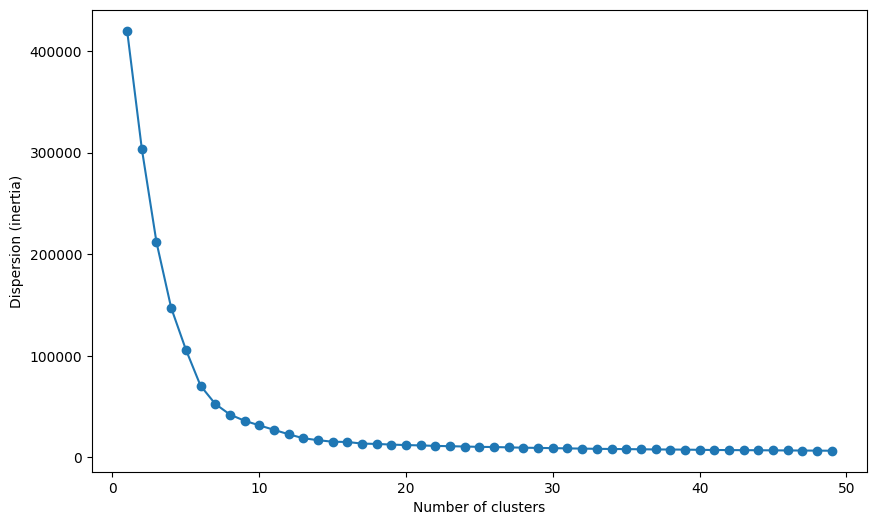

In [62]:
plt.plot(range(1, 50), dispersion, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.show()

In [64]:
# lets try with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0).fit(scaled_data)
Info['cluster'] = kmeans.labels_

In [67]:
Info['cluster']

0        0
1        1
2        0
3        2
4        0
        ..
29995    1
29996    0
29997    0
29998    0
29999    0
Name: cluster, Length: 30000, dtype: int32

In [ ]:
X_train = Info[x_train]
X_train['cluster_kmeans'] = kmeans.predict(scaled_data)

C:\Users\migue\AppData\Local\Temp\ipykernel_18696\719718484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['cluster_kmeans'] = kmeans.predict(scaled_data)


In [71]:
X_train.groupby(['cluster_kmeans']).mean()

,lifetime_spend_groceries,lifetime_spend_electronics,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,lifetime_spent,is_business,education_level,percentage_of_products_bought_promotion
cluster_kmeans,,,,,,,,,,,,,,
0,397.788217,178.318130,254.629663,280.324386,329.439263,149.522520,148.502389,49.934372,71.717925,312.865218,1860.176865,0.0,0.210191,0.342006
1,200.406291,4999.557484,20.033623,1500.946855,499.866161,57.739913,58.946421,49.912148,2002.197397,99.785249,9389.606291,0.0,1.008894,0.100002
2,5641.576207,457.563554,538.088278,740.247382,469.507272,971.896451,972.254072,405.711460,838.902996,1519.974258,11035.747673,0.0,1.197208,0.183964
3,996.955410,51.205621,1497.400042,20.439772,20.340025,0.290363,0.480769,99.929205,50.249155,199.434911,2737.290363,0.0,1.011412,0.050074
4,2.701444,1.149498,2.124160,2.302082,2.704784,2.615967,34997.747788,1.553669,0.000000,0.977930,35012.899391,1.0,0.000000,0.200151
5,14993.307935,199.970403,799.560034,900.786104,599.145886,1501.016583,1498.781276,199.985306,50.012804,4011.462636,20742.566331,0.0,0.701511,0.149955


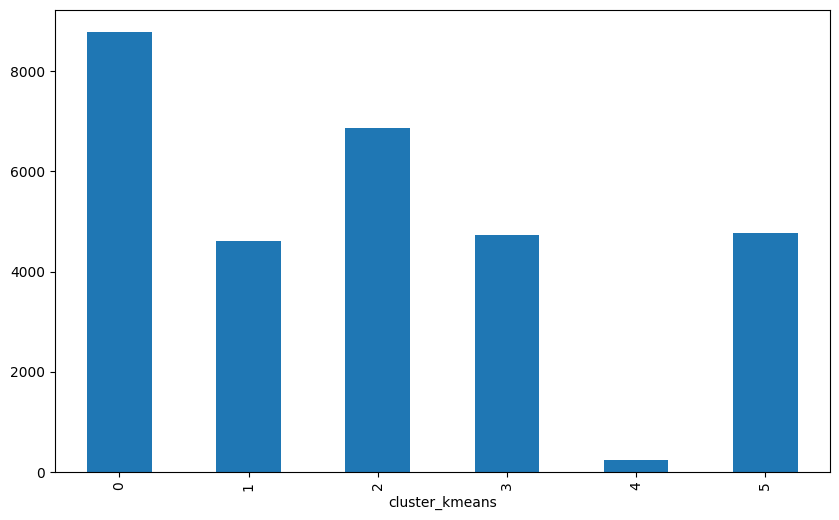

In [73]:
X_train.groupby(['cluster_kmeans']).size().plot(kind='bar')
plt.show()

In [74]:
import plotly.express as px

In [76]:
# Plot the clusters on a map using the latitude and longitude
fig = px.scatter_mapbox(Info, lat="latitude", lon="longitude", hover_name="customer_name", color = "cluster", color_continuous_scale = 'bluered')
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [77]:
# Calculate the averages of the clusters and the total of each 
Info.groupby(['cluster']).mean()

C:\Users\migue\AppData\Local\Temp\ipykernel_18696\79344356.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,customer_id,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,...,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,is_business,age,lifetime_spent,education_level
cluster,,,,,,,,,,,,,,,,,,,,,
0,14998.706665,0.710987,0.190400,0.837921,12.050614,397.788217,178.318130,12.147066,254.629663,280.324386,...,312.865218,0.342006,2010.969859,948915.200508,38.744558,-9.159833,0.0,50.668562,1860.176865,0.210191
1,15070.718655,0.689588,0.068547,0.500000,1.992625,200.406291,4999.557484,20.951844,20.033623,1500.946855,...,99.785249,0.100002,2009.978091,948143.663774,38.747749,-9.157489,0.0,56.326247,9389.606291,1.008894
2,14998.554101,2.142088,1.229639,0.639471,3.008435,5641.576207,457.563554,17.901542,538.088278,740.247382,...,1519.974258,0.183964,2009.944299,949283.898543,38.749417,-9.157170,0.0,47.603985,11035.747673,1.197208
3,14974.043956,1.159763,0.771133,0.311285,2.000423,996.955410,51.205621,10.001691,1497.400042,20.439772,...,199.434911,0.050074,2010.017117,950291.762712,38.748606,-9.157186,0.0,55.983516,2737.290363,1.011412
4,14358.973451,0.000000,0.000000,0.000000,1.000000,2.701444,1.149498,0.625775,2.124160,2.302082,...,0.977930,0.200151,2010.030973,948650.782609,38.866276,-9.111225,1.0,50.610619,35012.899391,0.000000
5,14995.381192,0.997901,0.271620,1.551008,7.999580,14993.307935,199.970403,11.914568,799.560034,900.786104,...,4011.462636,0.149955,2000.006507,950719.653254,38.747749,-9.157703,0.0,56.219563,20742.566331,0.701511


In [ ]:
Info.groupby(['cluster']).mean().T